In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [82]:
plt.rcParams['figure.figsize'] = [15, 5]

def plotpretify(ax, maxx, minx=0, miny=None, maxy=None, 
                Grid=True, LB=True, LL=True):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=LB,
        left=False,
        right=False,
        labelleft=LL)
    ax.grid(Grid)
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

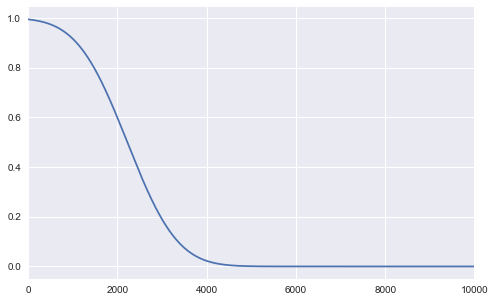

In [ ]:
def incircle(x, y, r=1):
    return np.power(x,2) + np.power(y,2) < r

def spawn(r=1):
    x=random.uniform(-1, 1)
    limits = [-np.sqrt(1 - x**2), np.sqrt(1 - x**2)]
    y=random.uniform(limits[0], limits[1])
#     print(f"(x,y) = ({x}, {y})")
    return [x, y]

def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(len(coord)):
            totalDist += abs(np.linalg.norm(coord[i]) - np.linalg.norm(coord[j]))
    return totalDist

def changeCoord(coord):
    i = random.randint(0,len(coord)-1)
    coord[i] = spawn()
    return coord

def getScheme_data(iters, plot="No"):
    linspace = np.linspace(0, 9, iters)
    answer = []

    for x in linspace:
        answer.append(0.5 +
                      math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)

    if plot == "Yes":
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.plot(answer, label="Acceptance chance")
        plotpretify(
            ax,
            iters)
        plt.show()
    return answer
    
coordList = []
for i in range(20):
    coordList.append(spawn())
coordList = np.array(coordList)

iterations = 10000
score = checkScore(coordList)
scheme = getScheme_data(iterations, plot="Yes")
for i in range(iterations):
    tmpList = changeCoord(coordList)
    tmpScore = checkScore(tmpList)
    if score < checkScore(coordList):
        coordList = tmpList
        score = tmpScore
    if scheme[i] > np.random.uniform():
        coordList = tmpList
        score = tmpScore
print(score)
 
plt.rcParams['figure.figsize'] = [10, 10]
sns.set()
sns.set_style("dark")
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(coordList[:,0],coordList[:,1])
circle1 = plt.Circle((0, 0), 1, alpha=0.2, color="olive")
ax.add_artist(circle1)
plotpretify(ax, 1.1, minx=-1.1, miny=-1.1, maxy=1.1, Grid=False, LL=False, LB=False)

In [60]:
np.linalg.norm((1,2))

2.23606797749979